In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Szükséges csomagok behívása

In [3]:
import pandas as pd
import re
import nltk
import numpy
import itertools
import os, glob
import operator
from collections import Counter
import codecs
from os import listdir
from os.path import join, isfile
from urlextract import URLExtract
extractor = URLExtract()

In [4]:
import codecs
import gensim
import gensim.corpora as corpora
import itertools
import logging
import numpy as np
import os
import pyLDAvis.gensim_models
import stat
from collections import defaultdict
from gensim.corpora import MalletCorpus
from gensim.models import CoherenceModel
from os import listdir
from os.path import join, isfile
import tqdm
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# LDA csomagok

In [5]:
import huspacy

# Load the Hungarian spaCy model (hu_core_news_lg)
nlp = huspacy.load("hu_core_news_lg")

In [ ]:
#Csak egyszer kell

pip install gensim==3.8.1 --user #ez a verzió támogatja a wrappers-t, kell a pyLDAvis-hez

### Adatbázis behívása

In [35]:
data = pd.read_excel("Data/FIN data/teljes_corpus_LDA_V17.xlsx")
data.head()

ID9  ID8  ID7  ID6  ID5  ID4  ID3                                id  \
0    0    0    0    0    0    0    0  3be8a84b2aeb997cd031ef9f7cfd5db0   
1    1    1    1    1    1    1    2  8193492bf7b41d85850f590921523308   
2    2    2    2    2    2    2    3  4d35edf60ccccb67e448ec1361abe040   
3    3    3    3    3    3    3    4  32512f3e7cb76cff206d49e9c0821f0b   
4    4    4    4    4    4    4    5  d14bc9cc7e47ebd8d145cee39adace26   

               Created    Domain  ... Title  \
0  2020-10-03 15:17:10     24.hu  ...     c   
1  2021-02-02 00:00:00  telex.hu  ...     a   
2  2021-02-24 00:00:00  telex.hu  ...     c   
3  2019-03-24 15:33:00  index.hu  ...     c   
4  2021-02-06 00:00:00  telex.hu  ...     c   

                                              sigbig  \
0  tüntetés_szervez budapesti sarok mihazánk tilt...   
1  meghall finanszírozás turizmus érdekelt vállal...   
2  sztrájk makói dolgozó_szakszervezet tájékoztat...   
3  tűnhet sztrájk múlik valahol sztrájkol sztrájk...   
4  járványügyi intézkedés vitatott kötelező bezár...   

                                             sigbig2  \
0  szombat_délután tüntetés_szervez budapesti sar...   
1  meghall finanszírozás turizmus érdekelt vállal...   
2  sztrájk_hirdet makói dolgozó_szakszervezet táj...   
3  tűnhet sztrájk múlik valahol sztrájkol sztrájk...   
4  járványügyi intézkedés vitatott kötelező bezár...   

                                             sigbig3  \
0  tüntetés_szervez sándor mihazánk mindenki lesz...   
1  meghall hang finanszírozás turizmus érdekelt v...   
2  sztrájk_hirdet makói dolgozó_szakszervezet táj...   
3  könnyű alig múlik valahol sztrájkol sztrájkbiz...   
4  járványügyi intézkedés vitatott vendéglátóhely...   

                                           filtered6  \
0  szombat délután tüntetés szervez budapesti bró...   
1  lap kormány meghall vendéglátós hang röpül men...   
2  szerda sztrájk hirdet makói continentalgyár do...   
3  könnyű tűnhet sztrájk év alig múlik hét jelent...   
4  járványügyi intézkedés vitatott pont vendéglát...   

                                             sigbig4  \
0  tüntetés_szervez szentkirályi sarok mihazánk m...   
1  meghall hang finanszírozás turizmus érdekelt v...   
2  sztrájk_hirdet makói dolgozó_szakszervezet táj...   
3  könnyű alig múlik valahol sztrájkol sztrájkbiz...   
4  járványügyi intézkedés vitatott vendéglátóhely...   

                                         sigbig_1103  \
0  tüntetés_szervez szentkirályi sarok hazánk min...   
1  meghall hang finanszírozás turizmus érdekelt v...   
2  sztrájk_hirdet makói dolgozó_szakszervezet táj...   
3  alig múlik valahol sztrájkol sztrájkbizottság ...   
4  járványügyi intézkedés vitatott vendéglátóhely...   

                                       sigbig_1103_2  \
0  tüntetés_szervez szentkirályi sarok hazánk min...   
1  meghall hang finanszírozás turizmus érdekelt v...   
2  sztrájk_hirdet makói dolgozó_szakszervezet táj...   
3  múlik valahol sztrájkol sztrájkbizottság munka...   
4  járványügyi intézkedés vitatott vendéglátóhely...   

                                         sigbig_1104  \
0  tüntetés_szervez szentkirályi sarok hazánk min...   
1  meghall hang finanszírozás turizmus érdekelt v...   
2  sztrájk_hirdet makói dolgozó_szakszervezet táj...   
3  múlik valahol sztrájkol sztrájkbizottság munka...   
4  járványügyi intézkedés vitatott vendéglátóhely...   

                                       sigbig_1104_2  
0  tüntetés_szervez szentkirályi sarok hazánk min...  
1  meghall hang finanszírozás turizmus érdekelt v...  
2  sztrájk_hirdet makói dolgozó_szakszervezet táj...  
3  múlik valahol sztrájkol sztrájkbizottság munka...  
4  járványügyi intézkedés vitatott vendéglátóhely...  

[5 rows x 24 columns]

## Excelből új mappába rendezése a végső szövegeknek

In [36]:
for i in range(len(data)):
    f = open("Data3/03. LDAhoz/Szövegek/"+str(data["ID"][i]), "w", encoding='utf-8')
    f.write(str(data["sigbig"][i]))
    f.close()

372

536

775

523

711

923

1464

1119

927

1507

1488

1932

918

1371

1105

1030

1359

1338

2330

1376

1454

1589

2205

1343

2315

3459

11026

687

1141

2040

1315

1178

2232

527

564

1387

453

660

455

721

2611

479

955

476

996

3377

727

312

560

411

911

1358

1462

181

2286

1427

1305

814

1665

899

1880

268

1842

1153

1309

645

1335

2774

1959

1715

979

2263

1843

881

697

1146

488

866

1646

1841

945

490

860

642

604

499

2415

247

1035

1089

823

1807

1360

829

1933

2513

1192

988

3149

1008

907

3169

2348

5330

1800

2129

2067

313

3496

2210

640

297

796

635

190

915

336

1181

930

1496

1548

872

898

2705

1710

1405

431

1257

160

200

1253

320

1259

3991

1761

1423

779

671

3000

1230

964

946

908

1615

3504

810

800

527

428

788

746

273

1053

995

2412

2739

1948

955

571

1039

428

1385

666

182

2223

3625

331

334

832

433

221

460

818

700

2606

1063

860

1006

602

436

592

379

584

475

1364

944

666

3067

503

425

1312

2477

3406

700

528

485

1298

1003

978

1197

886

3796

831

474

253

1800

955

289

835

446

679

1227

931

852

444

2216

255

1017

996

309

478

777

902

549

1179

682

1163

655

1497

655

2118

1245

1549

715

355

688

1041

859

2881

2070

1437

1048

819

933

1455

210

2177

932

257

268

633

302

573

1512

629

430

1523

1052

442

1250

442

716

1097

751

1196

376

1154

794

3303

586

358

1884

466

795

432

824

611

1517

1669

511

507

470

809

1227

623

773

372

851

845

578

410

609

1232

997

870

470

701

531

300

2930

895

2567

647

844

360

1040

627

646

891

693

770

250

1335

1178

1085

1003

1067

1394

612

1564

709

1274

910

413

837

692

1479

1154

1122

832

395

622

1429

1359

425

591

1169

1504

360

691

1144

1165

763

1282

1926

832

774

1286

1560

607

1186

539

1598

1947

729

339

394

381

697

801

4407

1001

722

542

294

590

636

1582

1671

887

2990

739

639

2910

641

342

1399

915

764

409

703

723

850

547

702

348

1821

1182

1056

1044

2027

1604

2129

425

1097

1579

979

377

1443

323

456

720

962

536

568

1503

607

1260

1843

2338

744

374

1455

1436

973

1750

668

3196

400

1627

498

578

1209

680

2105

621

700

313

1258

1161

3503

873

1757

604

328

263

1016

1816

555

1301

411

1178

844

395

1515

235

1391

570

787

1496

1119

1296

765

875

563

1261

1405

415

451

2944

997

689

1482

1580

1176

1800

7318

563

362

982

376

1795

651

1140

283

980

1258

503

3273

945

460

1246

508

471

263

455

778

695

1476

1624

307

793

1768

828

2337

1991

688

1078

485

1274

1122

595

745

373

1162

1048

551

614

1539

2484

1619

463

1002

1791

1884

366

732

751

418

1167

716

1104

785

433

810

699

706

585

1677

1290

640

1164

2225

2790

415

756

1228

757

644

440

833

1019

1612

2121

4835

821

773

1015

1610

948

1870

572

2086

604

773

341

452

680

637

878

1411

2020

336

2347

567

477

1763

1414

416

1090

1271

1185

374

817

446

388

1443

436

841

558

3230

575

1256

2036

1131

1721

404

1201

3106

1172

712

555

1923

1335

740

757

424

385

1151

605

325

916

342

701

301

1614

1228

1761

2988

842

729

465

989

197

1297

829

692

612

2164

1285

361

1287

499

373

858

458

414

620

496

808

493

1420

665

651

3513

702

1389

666

444

1016

1406

4719

262

1497

1202

578

1196

3267

2339

287

469

920

1866

877

873

4225

1762

263

724

640

826

1564

810

446

350

184

440

2032

454

342

1729

1324

1018

257

620

448

899

789

1450

454

527

430

470

1062

434

786

806

381

304

892

855

1361

728

359

1634

9175

2592

3234

3410

1097

683

1573

249

1206

982

1399

1154

259

548

1216

701

2486

371

1129

463

575

423

812

1909

3614

2072

1769

1035

469

903

1115

604

1314

1046

782

374

901

1564

878

582

1800

789

531

1067

1371

1835

351

1297

579

1736

1875

1896

1021

739

1443

2489

960

797

1790

1273

1382

799

950

866

2108

1077

836

1165

996

2147

656

456

1659

3424

317

796

1650

2875

3286

979

573

4020

1772

660

884

428

349

505

320

326

931

3745

1205

450

326

668

1548

438

654

358

850

1456

473

962

345

796

687

2639

1522

1439

393

536

563

1973

921

2483

815

1000

684

419

802

949

637

1168

994

1262

700

1171

627

3725

833

1019

955

1097

2231

529

366

1319

338

296

452

757

1766

3094

3086

1099

1295

287

559

925

1486

1185

3348

1031

1466

273

293

1075

1476

1367

321

373

726

561

802

1407

563

942

899

1395

1418

505

1449

2787

2239

897

861

1172

990

777

1630

419

280

1113

380

1408

1312

474

222

1879

1155

715

1635

1713

643

751

434

523

1031

439

327

3723

1154

2720

301

213

300

212

1937

516

441

599

615

583

166

5843

1927

1183

1297

2094

1550

814

798

2138

1385

2429

1185

412

439

1956

2068

768

1582

866

1905

666

3178

641

1865

710

1020

447

562

2987

663

1757

525

581

1316

460

654

1187

872

835

625

368

2372

1487

782

755

309

608

1171

1357

1216

3858

658

531

2274

3428

2878

3056

1189

2149

1556

936

582

495

311

664

289

1035

714

497

384

401

1119

3143

311

286

184

933

4434

1555

1702

748

782

428

1792

982

539

192

371

1249

2848

570

1315

504

412

4920

2656

910

564

2353

3159

1505

610

700

442

577

664

1592

909

2082

2063

1610

1090

303

761

1687

1026

1081

419

1001

674

405

786

1580

802

971

560

350

2612

685

2227

863

331

751

1120

705

320

412

1367

1348

887

523

1095

309

1286

1754

1805

586

537

1520

350

722

954

531

918

818

861

442

2450

3457

1686

844

543

1163

405

1835

448

1831

368

890

1108

1100

885

770

364

1652

806

636

664

812

916

442

515

1035

739

1245

325

2316

253

414

1004

686

1605

266

1268

1787

2293

1104

453

357

2262

1012

449

514

783

1157

1738

505

2574

743

1069

714

257

896

2022

1775

962

337

467

816

751

886

1200

509

1614

820

1056

516

1453

1104

585

564

1994

1083

1059

603

420

760

256

630

203

378

1396

1003

397

1337

373

484

1241

1430

349

908

509

1333

412

325

1627

572

580

1143

1315

1664

1304

837

414

1302

456

742

241

531

469

315

858

902

557

1737

2779

517

657

358

602

1623

727

710

1201

617

978

6857

1432

2049

559

1738

671

470

558

2054

1266

1020

1020

1192

747

2264

552

1305

1837

1365

497

1377

898

764

1550

1811

775

2748

2045

1197

3414

845

798

1768

1159

1379

989

2087

1587

2070

2064

1207

934

1700

1700

1343

2215

641

606

567

415

757

222

612

3330

571

1955

218

793

476

415

912

908

742

731

893

1119

913

508

322

431

4534

1590

563

927

865

1886

985

1111

876

866

403

10512

293

1088

249

1025

949

566

854

2914

2016

411

3571

384

2448

210

460

334

1405

1636

1754

1416

862

868

843

687

1729

2677

545

1029

285

1801

1522

698

210

450

1513

740

2707

436

1509

1261

1201

746

919

547

439

526

568

732

1411

2127

203

642

654

890

698

440

648

666

338

1124

721

968

1323

1173

269

503

351

218

921

942

832

789

2203

317

1056

692

719

407

1390

703

538

565

410

1247

3077

2554

240

1127

296

2031

991

1465

1227

551

1159

348

905

1090

1611

838

791

1201

2571

640

203

599

1911

1268

2221

1353

2035

947

2198

1292

866

1818

788

1251

1305

1967

1327

378

687

334

1144

508

1473

308

396

778

354

374

3307

210

2562

833

344

532

665

2197

820

827

508

1258

3576

471

3293

530

836

646

1062

1559

318

1095

942

917

361

999

1268

1481

4205

597

1330

1569

2430

1234

1001

1754

384

313

848

1032

1036

994

3402

1232

1523

462

1181

1206

481

1387

442

462

213

665

905

624

1168

713

604

554

543

482

517

638

430

938

1757

1805

1564

1505

1570

1523

1136

1031

441

1340

1897

793

436

1906

415

1395

536

809

976

529

733

416

1304

1378

401

464

487

822

1187

778

1535

2604

722

329

3554

810

801

2016

1487

417

982

1137

644

603

304

1098

1640

941

1776

1141

708

1571

2563

505

426

2003

395

2469

1002

853

509

466

1052

430

582

651

804

1675

412

518

312

322

408

248

317

281

414

362

261

554

609

1342

1210

433

1661

576

272

736

654

1394

355

392

948

495

611

1472

817

607

328

338

951

1031

468

2593

3460

235

502

552

882

2846

1090

202

889

664

988

310

1122

822

1912

295

421

3066

3391

1698

1635

1049

1025

707

1384

285

348

1274

285

717

1452

1284

1889

950

1031

291

812

685

875

917

714

228

677

356

493

1022

276

1442

2767

625

439

353

610

579

2007

712

573

295

998

3488

516

1788

2521

4181

4114

655

777

3556

740

303

357

485

305

403

951

1201

1843

1862

2065

558

1006

283

298

274

1046

1072

530

665

1688

388

547

913

481

896

831

944

650

818

585

1479

1199

1376

778

1100

1499

1811

566

1305

1592

1433

431

715

588

472

1000

505

2739

683

1305

517

1039

1204

391

1810

2884

463

1508

308

2004

423

464

824

199

374

730

310

301

1652

2826

1611

7966

1825

654

1366

536

2026

1507

310

485

251

606

1445

1491

3368

1054

624

548

850

1154

411

702

2314

1236

346

257

802

648

476

422

286

1333

547

474

420

1030

957

865

458

3890

742

390

982

373

1601

2188

800

470

271

312

1362

2278

404

843

580

1300

1036

253

1201

1087

1661

330

1721

426

575

2920

1476

252

1733

941

528

2986

1909

1762

1080

577

556

1621

1245

1396

581

217

543

719

1492

353

1106

950

1067

534

768

907

194

584

814

290

555

606

312

922

1370

782

284

375

663

261

517

460

599

764

542

1711

1357

755

755

1003

443

2062

720

157

502

1410

1780

759

298

1232

1010

2510

598

640

703

905

742

2466

790

918

1195

589

536

774

718

1050

645

889

513

573

255

2432

475

561

577

812

431

930

542

2170

1493

1493

1073

599

402

421

893

552

636

1791

573

762

800

609

1286

1163

232

1796

1463

922

455

1390

1410

942

1020

948

790

289

1393

1423

2194

882

899

2334

677

3011

3366

917

1230

941

1456

2116

283

350

383

513

1555

574

762

895

3994

262

304

211

2460

777

1086

1082

2524

1965

4264

734

624

781

2191

418

303

353

974

2760

4920

929

600

1082

480

1813

354

973

1109

745

622

840

453

1448

796

476

631

284

1147

365

412

1893

353

941

1227

704

716

961

518

687

1258

1124

3525

862

1671

2046

728

395

737

272

1657

386

1313

570

1497

3454

401

909

795

848

1324

563

908

412

1276

217

682

482

1342

431

902

1283

261

2357

858

728

1182

727

2176

1482

247

1088

501

953

599

1647

324

557

380

429

523

554

845

415

269

444

805

505

907

1489

842

311

1999

1714

577

1293

501

754

469

405

573

2310

673

1316

516

830

887

1043

213

247

162

848

3137

1083

431

325

689

865

817

443

708

579

650

253

976

373

498

2798

373

1757

1441

194

755

1202

951

422

761

375

535

409

690

363

516

558

997

998

543

736

369

870

719

768

918

591

940

541

1050

1602

1557

1760

386

510

703

1533

926

470

417

521

480

2659

805

868

800

570

641

575

1352

981

654

458

670

2091

1074

408

659

1464

659

405

383

171

876

1726

704

873

719

386

483

781

349

1402

1894

1115

4685

901

1988

1665

315

418

820

415

367

743

4820

1507

2064

2445

912

4349

737

1104

894

728

1100

2327

1784

1073

1686

1094

2748

285

636

1212

1726

442

2944

1138

979

788

2819

1280

1856

578

994

332

929

406

436

1799

1149

2100

2321

1004

1439

534

543

964

559

794

912

733

253

2760

389

341

720

339

347

112

838

3358

369

1029

1051

832

799

834

799

696

1251

1195

1458

362

521

996

826

1122

940

435

2290

320

684

645

2126

1486

1429

604

546

205

766

652

340

619

350

1213

478

1009

676

436

341

826

456

878

3091

2177

904

488

2465

185

563

788

1825

5330

742

1093

440

864

393

2077

802

3224

489

2003

327

839

569

709

416

1602

539

986

694

490

791

1493

707

2254

945

2039

856

192

599

703

379

1091

1201

466

1075

579

716

948

429

415

270

776

640

1751

373

830

485

1107

1294

2508

521

794

1481

593

536

940

769

409

583

835

1276

377

620

1951

952

626

1437

510

950

988

554

719

489

618

1985

311

1852

1065

941

427

256

1753

654

1461

983

812

1769

1017

496

1255

1262

786

2968

768

1570

1761

1916

572

734

539

1044

274

1053

752

654

480

347

1128

1032

408

2003

1256

637

2557

3337

585

450

1325

1285

3613

892

343

462

624

434

384

719

537

267

367

1750

330

334

1302

1264

806

648

1624

325

983

263

2032

661

1110

1638

1401

1309

692

1538

1754

825

959

955

914

499

912

237

1044

334

1089

428

899

478

1543

450

307

2030

1426

787

521

768

3290

653

568

1576

1249

357

375

2975

594

404

611

242

460

2707

691

621

552

523

1450

1312

3635

645

443

369

1305

2379

1076

391

420

369

215

408

1321

591

607

884

1306

1765

745

639

2316

752

556

455

638

534

2660

224

777

2196

729

552

925

482

975

358

660

711

3296

1716

1038

733

4202

728

1004

605

1086

1341

733

1348

533

795

275

382

4231

1307

506

467

339

592

438

615

1520

668

296

309

2132

249

2269

628

694

1178

915

818

1039

237

1145

400

778

448

371

689

511

883

452

1045

590

983

831

406

744

352

352

701

331

776

1278

1347

1192

838

500

183

255

772

386

958

1151

185

1750

954

265

861

435

4370

475

1175

762

691

1620

871

1077

1545

1400

1562

1010

437

242

564

865

374

871

575

1058

616

555

784

1418

720

596

1229

929

531

571

1125

1403

922

1003

626

376

2211

1244

868

1621

1627

1129

828

3809

1074

779

1522

982

1767

1766

768

889

1952

599

597

798

935

1708

419

625

513

675

324

1389

609

5451

370

1494

195

442

1282

396

1022

308

1833

1208

1313

3075

3551

647

666

395

186

839

380

1522

1019

1000

2358

483

806

374

487

2098

945

2087

1198

650

666

271

675

586

811

655

521

465

416

468

790

490

643

276

398

262

634

1131

857

428

921

2094

746

853

294

717

563

1073

541

219

526

3608

815

1174

995

892

614

411

1261

1824

847

1649

343

590

800

2137

685

556

591

499

1362

544

655

2380

1164

842

929

1118

347

1752

307

481

778

405

197

662

612

381

623

414

459

766

806

728

734

501

408

656

864

526

1567

334

747

833

2194

1040

2968

790

767

402

468

567

737

571

814

513

311

794

367

844

669

1133

1256

956

550

805

336

1100

1089

391

1267

368

2129

425

1344

909

465

718

919

627

515

368

301

1015

1503

271

730

800

646

371

2308

531

216

1022

6772

1655

1414

861

767

1189

292

540

1111

266

299

1147

726

1292

895

1371

1129

1037

519

863

742

1122

642

223

935

901

358

1110

271

477

428

1968

419

843

471

477

437

503

881

357

1135

816

844

542

1060

330

293

992

1344

295

243

689

360

419

2513

2329

268

819

651

1545

2217

2094

1888

300

1498

289

760

404

2715

1409

325

405

2630

386

518

5690

1221

1292

308

1808

956

338

1474

1309

379

871

246

1036

365

960

307

750

667

457

738

3337

1167

442

321

759

1603

1581

1291

1218

1923

1701

804

309

496

714

585

651

288

1818

460

1827

1140

553

2039

1348

394

1769

1193

436

1018

583

1346

941

980

966

3242

552

2335

1073

1182

868

900

594

1452

2867

266

588

709

436

323

1550

417

781

455

274

1059

1844

704

783

380

609

1959

2423

936

1526

439

805

436

630

648

844

2104

397

198

200

404

3519

616

651

143

568

6113

1321

642

835

304

798

313

1940

504

1241

436

1016

739

698

195

1108

551

732

707

1647

812

729

1401

605

407

272

1281

434

678

923

597

1941

1054

708

944

635

177

539

472

271

1115

466

1101

184

2201

1071

573

336

745

481

1516

719

636

395

1015

1101

493

414

265

1149

1317

912

551

712

586

250

758

1003

513

1031

1782

1100

970

1267

965

758

998

1119

435

711

928

304

3976

1153

1911

802

572

526

701

748

374

723

510

814

332

329

633

1602

943

577

526

1595

1796

185

988

574

626

524

295

280

1294

592

458

790

1901

500

847

1158

1715

932

1241

1146

735

433

438

1931

998

636

471

526

673

311

573

1000

1301

460

528

619

939

381

369

373

456

748

1238

661

919

1094

610

394

753

865

542

561

858

870

882

540

1178

432

1521

3205

640

353

1939

1845

1459

503

1306

880

597

1612

378

511

1202

390

585

1004

304

462

641

918

926

506

223

807

550

547

633

1018

1296

1871

1257

1279

502

922

521

469

1223

1139

454

249

279

2128

252

350

834

803

429

261

1226

1788

714

4446

1241

526

1318

1449

637

689

1818

345

440

2090

1268

1025

700

826

1080

1743

633

662

820

1146

510

373

581

573

2096

851

1268

629

491

2304

1362

538

549

375

1430

1057

357

598

143

255

343

185

389

782

580

2684

2144

821

709

426

934

1418

325

482

1458

431

1036

841

1126

533

633

461

2426

1350

945

930

1976

441

2008

777

1521

453

701

313

752

962

597

1338

1136

1141

1206

744

1469

1358

1200

5055

4807

1333

592

780

173

5857

738

304

520

517

223

1637

365

206

1132

3662

1279

2875

318

1196

297

2966

1465

996

256

847

1413

1344

458

788

1416

1684

662

1744

6721

1714

869

532

833

2045

1236

657

1318

611

993

396

1568

1411

1700

574

3053

1432

900

262

277

2121

2004

592

688

5348

798

1400

2489

1279

2772

2070

667

772

498

552

851

463

1943

786

2281

1046

1322

3777

1407

622

1123

208

540

366

1324

285

378

389

499

816

1487

3460

706

178

1522

387

652

1324

726

529

1816

1010

2446

1779

1417

781

912

687

1471

1954

2392

830

1703

285

346

5224

1173

800

777

1082

312

428

1870

252

1371

832

1286

2246

286

879

1784

1231

506

758

525

785

830

1050

726

924

2100

912

842

1134

742

973

542

704

780

868

1511

1312

468

2159

1738

954

1166

739

672

1747

154

1032

2222

1004

1372

655

2413

875

1068

5650

1091

4147

5794

3241

793

677

1338

345

1285

975

528

1436

713

471

498

905

1353

1291

1156

635

1343

1798

757

997

604

607

946

969

266

352

3268

1163

808

1359

632

1515

978

2891

802

1389

1022

1869

876

772

1432

295

545

302

669

313

517

273

882

307

1458

765

991

2703

182

1377

426

1822

778

539

914

2577

2762

317

1715

918

398

429

1193

1203

1395

506

1099

624

324

338

337

585

786

490

1689

1619

717

645

517

552

794

4097

821

616

375

516

496

318

379

1324

1421

874

844

1036

614

364

869

955

300

632

543

290

619

1051

946

2743

2059

669

956

600

2145

2439

877

2953

3729

345

778

715

1015

629

466

1199

2813

1545

3743

401

928

818

752

731

615

1519

437

366

1044

2746

875

304

2614

573

931

1176

557

788

462

2000

407

649

572

179

994

652

886

461

795

1585

1454

1008

1264

395

975

4213

1919

806

491

878

1281

1700

408

433

534

569

606

751

534

513

280

726

7777

714

280

1089

324

903

496

605

945

1053

2600

834

686

1000

520

554

1721

418

1867

1393

1207

837

298

3076

2368

1445

1507

955

472

249

496

325

1167

1005

241

288

1632

1094

1302

1001

392

640

813

1288

596

481

2036

398

492

924

656

486

804

765

234

399

2349

915

755

1785

1114

447

618

770

287

690

932

618

1013

394

1111

1324

855

1361

314

1173

956

815

679

943

581

886

739

1428

508

351

772

5079

611

222

926

1749

1582

1419

1318

959

1695

638

554

235

926

397

506

878

1229

1305

266

324

449

991

303

417

886

520

1561

2963

626

711

544

370

775

469

1320

367

893

1157

348

535

2683

1214

4250

932

688

1272

679

438

484

791

1296

677

834

584

2041

527

1738

2202

1734

482

758

1592

1272

854

1642

1204

1401

1582

624

686

1239

457

2939

268

865

1007

2354

268

474

378

1873

286

385

828

1250

408

311

413

1052

297

300

279

739

985

478

484

525

480

1248

244

753

465

331

306

758

191

434

358

1560

1024

586

652

746

173

550

578

1661

905

1058

1105

1188

368

1136

1031

1792

1125

2027

1004

1030

738

1153

1132

816

1545

1038

981

1992

2396

612

516

477

443

753

388

1129

745

1058

1307

335

1253

690

1225

369

438

1252

2089

1164

393

417

1318

2745

1744

647

1255

1486

2006

961

1630

353

2444

565

689

771

722

1084

626

1121

4863

1754

1015

287

825

1580

599

1109

3598

2249

914

669

1533

1617

550

118

2482

2296

783

983

919

1005

1210

993

409

841

953

1173

1234

1523

479

681

1089

1214

2217

539

311

1016

1090

329

1785

433

861

1320

758

312

1860

431

2230

228

347

484

350

990

575

550

296

1643

545

2431

621

555

903

3397

712

975

1769

2529

1673

559

1354

3325

3240

788

404

323

297

1227

1931

904

1281

1068

426

973

441

1426

1598

1848

761

410

1101

580

432

755

1679

1304

409

357

694

1238

1477

1297

646

317

1996

1162

827

5490

1406

544

582

334

821

624

556

989

745

636

1515

1562

622

1477

349

491

711

1412

262

857

676

1708

2867

1669

2732

1914

2407

354

429

1480

824

608

353

1419

1316

600

661

2979

1022

1150

366

2729

878

2639

2206

636

308

1702

1146

968

1501

466

880

1132

793

325

1392

1939

1146

2048

274

391

692

772

718

542

1119

329

2831

1339

719

1938

574

724

3348

986

313

2328

1746

498

596

1251

1317

1871

720

1533

1627

1035

373

1820

1306

1121

901

375

950

3692

1833

1023

868

411

353

863

368

1195

373

1115

424

1101

412

658

1008

846

567

782

303

367

910

814

328

1026

5313

863

490

332

629

750

648

1404

672

590

751

868

764

632

759

403

521

572

321

492

527

912

3743

3653

1639

973

2569

313

527

482

898

726

213

303

1138

521

1130

664

368

1072

1274

1158

392

489

1318

508

478

1275

2528

1024

1782

1838

535

1152

1474

1430

942

1087

1810

948

202

302

1100

356

405

448

837

825

1122

284

661

781

419

604

1446

2562

2443

262

980

964

374

2574

1581

977

781

1174

2835

834

798

1338

1036

2287

3381

1332

1082

831

541

1823

1782

2402

1136

1689

809

1950

1106

315

2774

2485

533

2528

1232

3119

1524

887

296

1064

1257

1182

743

624

1256

806

748

536

2982

921

737

1020

329

439

484

553

234

1654

1161

1176

784

1482

3381

555

765

739

1076

2947

984

1079

318

469

1724

773

1881

1982

353

1375

1007

255

767

655

1249

715

1731

1101

448

583

866

936

1181

485

2426

466

831

940

1448

1102

242

477

1335

493

694

1141

437

734

590

806

750

523

1120

419

1704

552

606

464

816

473

453

806

1358

1257

776

475

1465

379

818

898

999

356

429

790

437

478

1641

594

647

605

520

354

508

882

788

283

915

1157

936

381

660

718

945

372

396

389

594

196

578

428

951

871

1184

427

1143

2449

779

763

844

557

705

487

333

1015

713

357

460

559

780

776

283

255

1066

395

511

678

2431

566

354

1103

361

807

880

467

549

452

1166

259

931

1320

312

573

767

451

562

532

389

297

1899

531

863

617

1645

1085

958

483

669

459

286

347

466

499

947

458

505

380

848

790

1004

618

600

401

816

427

357

1525

407

762

1112

1799

632

1482

3788

440

978

459

193

711

474

517

515

424

375

1873

584

913

1915

1143

946

1896

622

440

1091

1425

425

872

647

800

733

1143

811

5301

1419

737

694

734

1385

918

1747

1095

1108

627

780

488

747

2157

5644

3970

988

3221

534

2255

1699

1027

1097

1547

768

371

890

842

456

2096

498

678

426

652

846

567

1017

2306

661

501

485

372

1259

951

461

594

3427

320

1156

579

535

765

359

2985

845

1767

2999

679

194

2099

674

1171

583

302

6099

390

1250

1008

2948

866

654

728

1465

544

654

745

307

1558

430

754

709

387

1442

1208

486

666

796

1528

2722

856

1536

542

1667

1356

446

1260

791

956

721

1281

2256

283

184

1376

993

593

328

1547

1185

677

355

432

2713

2717

2507

3011

938

1046

1060

654

383

2215

574

1819

1295

695

499

770

2284

401

599

1205

850

361

2304

1992

792

550

726

1139

208

1266

2749

788

499

1456

306

784

965

663

816

669

485

384

281

1471

929

823

1065

466

1441

1093

530

332

1332

599

584

1260

358

1776

1054

1458

1182

898

336

2000

2997

855

222

360

285

210

1773

518

515

879

1117

1763

1881

710

1149

1325

376

456

1004

537

1005

2058

918

446

1473

664

955

412

341

272

2128

1040

784

576

1031

683

1317

1548

833

1020

1461

1177

423

1098

395

242

349

403

2252

511

5055

1365

617

1865

416

534

406

881

1103

416

596

728

399

198

368

875

314

274

600

441

380

1230

1702

844

296

1480

1236

603

281

789

718

470

377

2010

611

370

527

352

401

1393

882

263

856

409

265

385

555

221

610

416

900

616

259

1606

183

302

1522

824

1009

828

436

559

436

215

1536

533

491

578

534

566

1352

318

1107

391

658

291

511

2292

2106

1424

314

946

774

796

2820

2105

191

1692

582

1066

1212

164

1432

1092

677

1682

706

796

423

2659

730

336

865

1592

789

1006

1500

1084

702

800

464

1001

594

1157

1904

342

259

313

239

972

467

1138

1202

1691

492

1234

1199

2950

1816

443

424

952

661

389

215

892

566

1131

553

2117

581

369

783

886

734

2258

1087

1106

1545

347

616

726

413

1144

548

984

777

787

1593

748

1099

323

710

699

1417

338

2754

319

518

465

568

1036

679

572

774

516

680

472

381

310

357

1005

366

425

691

309

1050

557

938

746

791

1697

2049

2157

227

508

834

236

506

2644

1887

723

512

2029

972

710

366

312

1772

866

2001

568

1134

1027

840

329

484

1470

660

261

820

251

206

230

1194

1661

4050

949

487

1105

1412

659

226

674

1009

414

1293

370

748

862

288

729

1131

605

826

2428

974

710

1380

730

2020

363

3062

909

1210

795

2584

758

661

464

1270

1278

797

404

754

2160

705

417

369

235

426

339

3372

2145

924

2143

1979

755

1353

2663

761

1007

808

341

447

806

704

2012

2856

4460

648

771

4125

1206

826

710

887

1501

1367

1560

2537

868

2026

933

972

835

935

1657

838

1502

1146

422

703

571

816

1693

1211

358

314

1066

2125

688

375

552

616

529

582

575

314

356

422

2089

416

583

919

1053

1003

498

995

609

1862

995

1108

1138

286

223

1822

634

612

281

739

1302

1211

1028

1146

1419

791

## Az LDA modellhez szükséges elemek behívása

In [7]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/mallet/'})
mallet_path = r'C:/mallet/bin/mallet.bat'
#MALLET útvonal megadás

In [8]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet

### Szövegek egyberakása egy dictionary-be

In [9]:
in_path = 'Data/03. LDAhoz/Szövegek/'
in_files = [f for f in listdir(in_path) if isfile(join(in_path, f))]
in_files = sorted(in_files)

txt = []
for file_name in in_files:
    article = open(join(in_path,file_name), "r", encoding='utf8').read()
    full = article
    txt.append(full)

In [38]:
txt[0]

'szombat_délután tüntetés_szervez budapesti sarok hazánk tiltakozik mindenki című könyv kiadó leszbikus egyesület székhely mese szereplő magyar_társadalom egyegy kisebbségi hív_figyelem meleg roma megjelenik dúró_dóra hazánk politikus meleg titulál nyilvános könyv szombati_demonstráció budapest_pride szervező készül beszéd ablak használt zene játszik mérce beszámoló szombat_délelőtt szimbólum lászik tüntetés norbert norbert norbert norbert norbert norbert '

In [15]:
# Szövegek egy változóba ömlesztése

txts = []
for t in txt:
    txts.append(t.strip().split())
words = list(itertools.chain(*txts))

In [16]:
len(words)

976618

In [14]:
len(words)

1235132

In [17]:
dictionary = corpora.Dictionary(txts)
dictionary.save('Data/03. LDahoz/dictionary.dict') # a dictionary mentése (figyelj az útvonalra)

In [18]:
print(dictionary[0])
print(len(dictionary))

ablak
5745


In [19]:
corpus = [dictionary.doc2bow(text) for text in txts]
MalletCorpus.serialize("Data/03. LDAhoz/corpus/corpus.mallet", corpus, dictionary) # a corpus mentése (figyelj az útvonalra)

In [44]:
print(len(corpus))
print('Az első dokumentum reprezentációja:', corpus[0])

7781
Az első dokumentum reprezentációja: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 6), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)]


### További csomagok behívása és igazítása

In [10]:
from gensim.test.utils import common_corpus, common_dictionary

In [11]:
from gensim.models.wrappers import LdaMallet

In [46]:
logging.basicConfig(filename='Data/00. models/gensim.log', # útvonal!!!
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

## Egyszerű LDA futtatása a megfelelő topikszám kereséséhez

In [29]:
of = codecs.open('Data/00. models/coherence_values.txt', 'w', 'utf-8')
for run_number in range(3):
    rs = 1
    for tn in range(13, 22):
        np.random.seed(123)
        model = gensim.models.wrappers.LdaMallet(mallet_path,
                                                 corpus=corpus,
                                                 num_topics=tn,
                                                 id2word=dictionary,
                                                 random_seed=rs+run_number)
        rs += 1
        lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model)
        lda.save(('Data/00. models/lda_t' + str(tn) + '_r' + str(run_number) +'.model'), ignore=())

        coherence_model = CoherenceModel(model=model,
                                         texts=txts,
                                         dictionary=dictionary,
                                         coherence='c_v')
        coherence_value = coherence_model.get_coherence()
        exp =  'topic ' +str(tn) + ' run' + str(run_number) + ' c_v: ' + str(coherence_value) + '\n'
        of.write(exp)
of.close()

Txt fájl ellenőrzése és a legoptimálisabb modell kiválasztása

In [30]:
model = gensim.models.LdaModel.load('Data/00. models/lda_t19_r0.model')

In [31]:
model.show_topic(6)

[('szakszervezet', 0.06865767177051224),
 ('dolgozó', 0.06053868310677649),
 ('sztrájk', 0.037310290228578166),
 ('munkavállaló', 0.030572540300166758),
 ('munkáltató', 0.022200886014115587),
 ('munkabeszüntetés', 0.015328381087135952),
 ('béremelés', 0.01374500985395927),
 ('gyár', 0.013458655482001786),
 ('megállapodás', 0.011471019253120421),
 ('vállalat', 0.010982532383310593)]

In [21]:
for doc in range (len(corpus)):
    tp = model[corpus[doc]]
    tp = sorted(tp, key = lambda x: (x[1]), reverse=True)
    for i in range(10):
        if tp [0][0] == 0:
            print(txt[doc])
            print("*****")
            print(tp)
            print("++++++")

csütörtök éjjel tüntet rabszolgatörvény kossuth_tér nyugati összetűzés rendőr tüntető parlament videó készül amint demonstráló rész tömeg hajnali megmaradt csoport járda szorít igazoltat tudósítás tüntető kamera válaszol jogszabály tüntető megtesz utasítás megmond történik tüntetés részlet olvashat 
*****
[(0, 0.2322121096168824), (8, 0.07963067037874706), (17, 0.05562119193555836), (10, 0.05507267470905762), (12, 0.04674778434456799), (2, 0.0450421549055152), (5, 0.04420884669812366), (19, 0.044110334426925385), (11, 0.04199480964044673), (7, 0.034101064006115504), (18, 0.03349068140434784), (9, 0.033129201619477446), (16, 0.03299587548965542), (14, 0.03246754266775408), (3, 0.032176951591643375), (13, 0.03185468818588154), (1, 0.03166853653080714), (15, 0.031470952969193305), (4, 0.031210431621581936), (6, 0.030793497257717944)]
++++++
csütörtök éjjel tüntet rabszolgatörvény kossuth_tér nyugati összetűzés rendőr tüntető parlament videó készül amint demonstráló rész tömeg hajnali megm

In [32]:
import pyLDAvis.gensim_models

In [34]:
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(vis, 'Data/01. vizual/model_topics_t19_r0.html')

# Komplex modell szűkített topikszámra

In [8]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from multiprocessing import freeze_support
from datetime import datetime
# még több csomag

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Starting run number: 01.



  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

  9%|███████▌                                                                           | 1/11 [01:37<16:17, 97.77s/it]


Current model coherence is 0.6063085294577377 with 15 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 18%|███████████████                                                                    | 2/11 [03:05<13:44, 91.65s/it]


Current model coherence is 0.6649610376465305 with 16 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 27%|██████████████████████▋                                                            | 3/11 [04:34<12:04, 90.52s/it]


Current model coherence is 0.6589177158344153 with 17 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 36%|██████████████████████████████▏                                                    | 4/11 [06:05<10:34, 90.70s/it]


Current model coherence is 0.6682964116994389 with 18 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 45%|█████████████████████████████████████▋                                             | 5/11 [07:36<09:04, 90.79s/it]


Current model coherence is 0.6387662734032468 with 19 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 55%|█████████████████████████████████████████████▎                                     | 6/11 [09:06<07:32, 90.55s/it]


Current model coherence is 0.653373420043649 with 20 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 64%|████████████████████████████████████████████████████▊                              | 7/11 [10:40<06:07, 91.81s/it]


Current model coherence is 0.6463475014615981 with 21 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [12:14<04:37, 92.44s/it]


Current model coherence is 0.6905835473109841 with 22 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [13:43<03:02, 91.50s/it]


Current model coherence is 0.6250400980143841 with 23 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [15:12<01:30, 90.46s/it]


Current model coherence is 0.6621106532467561 with 24 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [16:39<00:00, 89.45s/it]
                                                                                                                       


Current model coherence is 0.6862991123284048 with 25 topics.


22

22

22

22

22

21

22

22

22

22

22

Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

 20%|████████████████▏                                                                | 1/5 [16:39<1:06:38, 999.60s/it]

Starting run number: 02.



  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

  9%|███████▌                                                                           | 1/11 [01:22<13:48, 82.87s/it]


Current model coherence is 0.658969358798219 with 15 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 18%|███████████████                                                                    | 2/11 [02:46<12:28, 83.14s/it]


Current model coherence is 0.641518800419337 with 16 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 27%|██████████████████████▋                                                            | 3/11 [04:12<11:15, 84.47s/it]


Current model coherence is 0.6163279709091718 with 17 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 36%|██████████████████████████████▏                                                    | 4/11 [05:36<09:50, 84.39s/it]


Current model coherence is 0.6555140005735632 with 18 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 45%|█████████████████████████████████████▋                                             | 5/11 [07:02<08:29, 84.92s/it]


Current model coherence is 0.6324022043936116 with 19 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 55%|█████████████████████████████████████████████▎                                     | 6/11 [08:34<07:16, 87.37s/it]


Current model coherence is 0.6206939620483028 with 20 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 64%|████████████████████████████████████████████████████▊                              | 7/11 [10:04<05:53, 88.37s/it]


Current model coherence is 0.643147782682549 with 21 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [11:38<04:29, 89.94s/it]


Current model coherence is 0.6810968798253761 with 22 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [13:12<03:02, 91.33s/it]


Current model coherence is 0.661184972756302 with 23 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [14:47<01:32, 92.46s/it]


Current model coherence is 0.6942313386985907 with 24 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [16:56<00:00, 103.64s/it]
                                                                                                                       


Current model coherence is 0.6654420991119803 with 25 topics.


21

21

22

22

22

22

21

22

21

22

22

Text(0.5, 15.0, 'Num Topics')

Text(20.625, 0.5, 'Coherence score')

 40%|████████████████████████████████▊                                                 | 2/5 [33:36<50:29, 1009.89s/it]

Starting run number: 03.



  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

  9%|███████▍                                                                          | 1/11 [02:06<21:07, 126.73s/it]


Current model coherence is 0.6663907150006183 with 15 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 18%|██████████████▉                                                                   | 2/11 [04:17<19:22, 129.16s/it]


Current model coherence is 0.6102437406607863 with 16 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 27%|██████████████████████▎                                                           | 3/11 [06:34<17:41, 132.74s/it]


Current model coherence is 0.6355622387485814 with 17 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 36%|█████████████████████████████▊                                                    | 4/11 [08:53<15:47, 135.35s/it]


Current model coherence is 0.6429968706426025 with 18 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 45%|█████████████████████████████████████▎                                            | 5/11 [11:12<13:38, 136.48s/it]


Current model coherence is 0.6559495020039247 with 19 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 55%|████████████████████████████████████████████▋                                     | 6/11 [13:35<11:33, 138.72s/it]


Current model coherence is 0.6467727139651666 with 20 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 64%|████████████████████████████████████████████████████▏                             | 7/11 [15:55<09:16, 139.10s/it]


Current model coherence is 0.6491691424786956 with 21 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 73%|███████████████████████████████████████████████████████████▋                      | 8/11 [18:18<07:01, 140.34s/it]


Current model coherence is 0.7145871443077229 with 22 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 82%|███████████████████████████████████████████████████████████████████               | 9/11 [20:40<04:42, 141.00s/it]


Current model coherence is 0.7016952378962683 with 23 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 91%|█████████████████████████████████████████████████████████████████████████▋       | 10/11 [23:09<02:23, 143.41s/it]


Current model coherence is 0.6817415503053658 with 24 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [25:39<00:00, 145.48s/it]
                                                                                                                       


Current model coherence is 0.6573521714363355 with 25 topics.


22

22

22

22

22

22

22

22

22

22

22

Text(0.5, 15.0, 'Num Topics')

Text(20.625, 0.5, 'Coherence score')

 60%|█████████████████████████████████████████████████▏                                | 3/5 [59:16<41:44, 1252.08s/it]

Starting run number: 04.



  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

  9%|███████▍                                                                          | 1/11 [02:09<21:39, 129.97s/it]


Current model coherence is 0.6399153244525206 with 15 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 18%|██████████████▉                                                                   | 2/11 [04:21<19:39, 131.04s/it]


Current model coherence is 0.6111333241552905 with 16 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 27%|██████████████████████▎                                                           | 3/11 [06:36<17:43, 132.93s/it]


Current model coherence is 0.6472545289422833 with 17 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 36%|█████████████████████████████▊                                                    | 4/11 [08:53<15:39, 134.22s/it]


Current model coherence is 0.6901618983733715 with 18 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 45%|█████████████████████████████████████▎                                            | 5/11 [11:10<13:31, 135.29s/it]


Current model coherence is 0.6695357762646282 with 19 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 55%|████████████████████████████████████████████▋                                     | 6/11 [13:33<11:29, 137.87s/it]


Current model coherence is 0.6995606320381687 with 20 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 64%|████████████████████████████████████████████████████▏                             | 7/11 [15:51<09:12, 138.09s/it]


Current model coherence is 0.6695732449464383 with 21 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 73%|███████████████████████████████████████████████████████████▋                      | 8/11 [18:13<06:58, 139.41s/it]


Current model coherence is 0.634591474516502 with 22 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 82%|███████████████████████████████████████████████████████████████████               | 9/11 [20:35<04:40, 140.13s/it]


Current model coherence is 0.7167760169656026 with 23 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 91%|█████████████████████████████████████████████████████████████████████████▋       | 10/11 [23:07<02:23, 143.61s/it]


Current model coherence is 0.6706647766615971 with 24 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [25:36<00:00, 145.24s/it]
                                                                                                                       


Current model coherence is 0.6714600471859814 with 25 topics.


22

22

22

22

22

22

22

21

22

22

22

Text(0.5, 15.0, 'Num Topics')

Text(20.625, 0.5, 'Coherence score')

 80%|████████████████████████████████████████████████████████████████                | 4/5 [1:24:53<22:44, 1364.36s/it]

Starting run number: 05.



  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

  9%|███████▍                                                                          | 1/11 [02:13<22:17, 133.75s/it]


Current model coherence is 0.6253244704832838 with 15 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 18%|██████████████▉                                                                   | 2/11 [04:28<20:10, 134.51s/it]


Current model coherence is 0.6715648767977798 with 16 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 27%|██████████████████████▎                                                           | 3/11 [06:58<18:50, 141.34s/it]


Current model coherence is 0.6563967507034002 with 17 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 36%|█████████████████████████████▊                                                    | 4/11 [08:48<15:03, 129.02s/it]


Current model coherence is 0.6658775305806757 with 18 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 45%|█████████████████████████████████████▎                                            | 5/11 [10:25<11:44, 117.34s/it]


Current model coherence is 0.7040500322469159 with 19 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 55%|████████████████████████████████████████████▋                                     | 6/11 [11:59<09:07, 109.58s/it]


Current model coherence is 0.6547015452550191 with 20 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 64%|████████████████████████████████████████████████████▏                             | 7/11 [13:32<06:56, 104.06s/it]


Current model coherence is 0.6754061809771954 with 21 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 73%|███████████████████████████████████████████████████████████▋                      | 8/11 [15:08<05:04, 101.49s/it]


Current model coherence is 0.6588333285881588 with 22 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [16:42<03:18, 99.13s/it]


Current model coherence is 0.6770866127821215 with 23 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [18:16<01:37, 97.76s/it]


Current model coherence is 0.6779681782677797 with 24 topics.


C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [19:52<00:00, 97.10s/it]
                                                                                                                       


Current model coherence is 0.6287300619115145 with 25 topics.


22

22

22

22

22

22

22

22

22

22

22

Text(0.5, 15.0, 'Num Topics')

Text(20.625, 0.5, 'Coherence score')

100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [1:44:46<00:00, 1257.25s/it]

All finished.
Duration: 1:45:55.359644


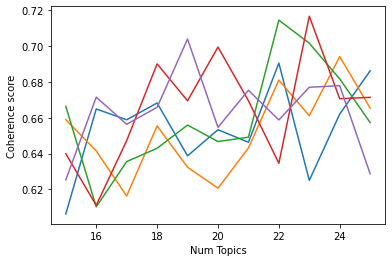

In [37]:
# Save document to topic Excel files for each run?
save_document_to_topic = True

# Save visualization files for each run?
save_visualization = True

# Define in_folder for corpus files.
in_folder_corpus = 'Data/03. LDAhoz/Szövegek'
in_folder_original = 'Data/Nolink_txts'

# Minimal article length (words).
minimal_length = 5

# Settings.
c_times = 5  # number of times to be run
c_start = 15  # starting topic number
c_limit = 26  # max. topic number
c_step = 1  # stepping interval

# Outfile path for writing out model coherences and models.
outfile_path = os.path.join('Data/04. LDA/Data/')

# Mallet settings.
# mallet_path = os.path.join('C:', 'Work', 'mallet', 'mallet-2.0.8', 'bin', 'mallet')
mallet_path = r'C:/mallet/bin/mallet.bat'
os.environ.update({'MALLET_HOME':r'C:/mallet/'})

if __name__ == '__main__':
    freeze_support()

    start_time = datetime.now()

    def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
        """
        Compute c_v coherence for various number of topics

        Parameters:
        ----------
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max num of topics

        Returns:
        -------
        model_list : List of LDA topic models
        coherence_values : Coherence values corresponding to the LDA model with respective number of topics
        """
        coherence_values = []
        model_list = []
        rs = 0
        for num_topics in tqdm.tqdm(range(start, limit, step), leave=False):
            model = gensim.models.wrappers.LdaMallet(mallet_path,
                                                     corpus=corpus,
                                                     num_topics=num_topics,
                                                     workers=3,
                                                     id2word=dictionary,
                                                     optimize_interval=10,
                                                     #rs+run_number=13 ha t18_r01 a modell
                                                     random_seed=rs+run_number)
            rs += 1
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model,
                                            texts=texts,
                                            dictionary=dictionary,
                                            processes=1,
                                            coherence='c_v')
            coherence_value = coherencemodel.get_coherence()
            coherence_values.append(coherence_value)

            # Save model.
            model.save(os.path.join(outfile_path, 'model_topics_t'+str("{:02d}".format(num_topics))+'_r'+str("{:02d}".format(run_number+1))+'.model'))
            lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model)
            lda.save(os.path.join(outfile_path, 'model_topics_t'+str("{:02d}".format(num_topics))+'_r'+str("{:02d}".format(run_number+1))+'.model'))

            
            # Save visualization.
            if save_visualization:
                lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model)
                vis = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
                pyLDAvis.save_html(vis, os.path.join(outfile_path, 'visualization_t'+str("{:02d}".format(num_topics))+'_r'+str("{:02d}".format(run_number+1))+'.html'))

            # Save document to topic Excel.
            if save_document_to_topic:
                df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=original_documents)
                df_dominant_topic = df_topic_sents_keywords.reset_index()
                df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
                df_dominant_topic.to_excel(os.path.join(outfile_path, 'document_dominant_topics_t'+str("{:02d}".format(num_topics))+'_r'+str("{:02d}".format(run_number+1))+'.xlsx'))

            print('\nCurrent model coherence is '+str(coherence_value)+' with '+str(num_topics)+' topics.')
        return model_list, coherence_values


    def format_topics_sentences(ldamodel, corpus, texts):
        # Init output
        sent_topics_df = pd.DataFrame()

        # Get main topic in each document
        for i, row in enumerate(ldamodel[corpus]):
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            # Get the Dominant topic, Perc Contribution and Keywords for each document
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:  # => dominant topic
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_keywords]), ignore_index=True)
                else:
                    break
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

        # Add original text to the end of the output
        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
        return sent_topics_df

    # Load corpus files.
    in_path = 'Data/03. LDAhoz/Szövegek'
    in_files = [f for f in os.listdir(in_path) if os.path.isfile(os.path.join(in_path, f))]

    # Add all files to a list.
    txt = []
    files_used = []
    for filename in tqdm.tqdm(in_files):
        with open(os.path.join(in_path, filename), 'r', encoding='utf-8') as infile:
            article = infile.read()
        if len(article.split(' ')) > minimal_length:
            txt.append(article)
            files_used.append(filename)

    # Create lists containing the texts and the words.
    txts = []
    for t in txt:
        txts.append(t.strip().split())
    words = list(itertools.chain(*txts))

    # Load original documents.
    original_documents_folder = os.path.join(in_folder_original)
    original_document_files = [f for f in os.listdir(original_documents_folder) if os.path.isfile(os.path.join(original_documents_folder, f))]

    # Add all files to a list.
    original_documents = []
    for filename in tqdm.tqdm(original_document_files):
        if filename in files_used:
            with open(os.path.join(original_documents_folder, filename), 'r', encoding='utf-8') as infile:
                article = infile.read()
            lst = [str(filename + ': ' + article)]
            original_documents.append(lst)

    # Create Dictionary
    dictionary = corpora.Dictionary(txts)
    dictionary.save('Data/04. LDA/corpus/dictionary.dict')

    # Create corpus
    corpus = [dictionary.doc2bow(text) for text in txts]

    # Write corpus in Mallet format to disk
    MalletCorpus.serialize("Data/04. LDA/corpus/corpus.mallet", corpus, dictionary)

    # Read corpus
    # corpus = MalletCorpus("data/corpus/corpus.mallet")

    # Run models.
    for run_number in tqdm.tqdm(range(0, c_times)):
        print('Starting run number: '+str("{:02d}".format(run_number+1))+'.')
        model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=txts, start=c_start, limit=c_limit, step=c_step)

        with open(os.path.join(outfile_path, 'coherence_values_r'+str("{:02d}".format(run_number+1))+'.tsv'), 'w', encoding='utf-8') as outfile:
            c = 0
            for value in coherence_values:
                outfile.write(str(model_list[c].num_topics)+'\t'+str(value)+'\n')
                c += 1

        # Create plot.
        x = range(c_start, c_limit, c_step)
        plt.plot(x, coherence_values)
        plt.xlabel("Num Topics")
        plt.ylabel("Coherence score")
        plt.savefig(os.path.join(outfile_path, 'coherence_values_r'+str("{:02d}".format(run_number+1))+'.png'))
        # plt.show()

    end_time = datetime.now()
    print('All finished.\nDuration: {}'.format(end_time - start_time))

# Topikok elemzése
modell behívása

In [38]:
model = gensim.models.LdaModel.load('Data/04. LDA/Data/model_topics_t19_r05.model')

### Corpus behívása

In [10]:
corpus = [dictionary.doc2bow(text) for text in txts]
MalletCorpus.serialize("Data/04. LDA/corpus/corpus_t17_r02.mallet", corpus, dictionary) # a corpus mentése (figyelj az útvonalra)

In [71]:
corpus = MalletCorpus("Data3/04. LDA/corpus/corpus_t17_r02.mallet")

In [11]:
txt[0]

'szombat_délután tüntetés_szervez budapesti sarok hazánk tiltakozik mindenki könyv kiadó leszbikus egyesület székhely mese magyar_társadalom kisebbségi hív_figyelem meleg roma család belüli erőszak dúró_dóra hazánk meleg titulál nyilvános fordítva könyv szombati_demonstráció budapest_pride szervező ablak használt zene játszik beszámoló szivárványos szimbólum lászik norbert norbert norbert norbert norbert norbert '

In [27]:
model[corpus[0]]

[(7, 0.5154865000410543), (8, 0.4649861332639025)]

In [17]:
model.show_topic(0)

[('rendőr', 0.0737755227300626),
 ('tüntető', 0.050738573591390806),
 ('rendőrség', 0.028028970088792505),
 ('kossuth_tér', 0.015835345145055035),
 ('demonstráló', 0.012643725193338517),
 ('erőszak', 0.012439134170792586),
 ('könnygáz', 0.0123982159662834),
 ('parlament', 0.011948115716682353),
 ('erőszakos', 0.011293424444535374),
 ('békés', 0.01080240599042514)]

Kiegészítés txt-vel

In [75]:
in_path = 'Data/Nolink_txts/'
in_files = [f for f in listdir(in_path) if isfile(join(in_path, f))]
in_files = sorted(in_files)

txt = []
for file_name in in_files:
    article = open(join(in_path,file_name), "r", encoding='utf8').read()
    full = article
    txt.append(full)

### Modell vizualizáció

In [39]:
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(vis, 'Data/04. LDA/vizual/model_topics_t19_r05.html')

C:\Users\Marci Datalyze\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
